<a href="https://colab.research.google.com/github/ishaj72/ML-Practise-Model/blob/main/Convolution.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# BatchNormalization

---



In [1]:
import keras
import tensorflow as tf
import matplotlib.pyplot as plt

In [2]:
data = tf.keras.datasets.mnist
(x_train, y_train ) , (x_test,y_test) = data.load_data()

11490434/11490434 [==============================] - 0s 0us/step


In [3]:
x_train.shape

(60000, 28, 28)

In [4]:
x_test.shape

(10000, 28, 28)

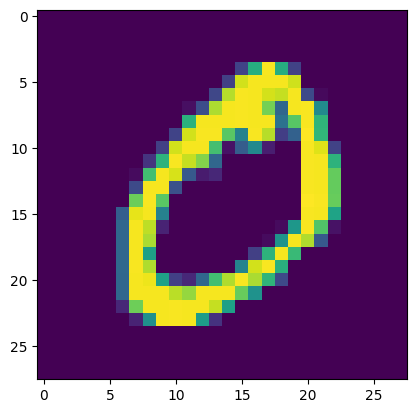

In [5]:
plt.imshow(x_train[1])

In [6]:
x_train = x_train.reshape(60000,28,28,1)

In [7]:
x_train.shape

(60000, 28, 28, 1)

In [8]:
x_test=x_test.reshape(x_test.shape[0],28,28,1)

In [9]:
x_test.shape

(10000, 28, 28, 1)

In [10]:
from keras.models import Sequential
from keras.layers import Conv2D,Dense,MaxPool2D,Flatten
from keras.layers.normalization.batch_normalization import BatchNormalization
tf.random.set_seed(40)

In [56]:
model = Sequential()

model.add(Conv2D(32,(3,3),activation='tanh',input_shape=(28,28,1),padding='valid'))

model.add(BatchNormalization())

model.add(MaxPool2D(pool_size=(2,2)))

model.add(BatchNormalization())

model.add(Conv2D(64,(3,3),activation='tanh',padding='valid'))

model.add(BatchNormalization())

model.add(MaxPool2D(pool_size=(2,2)))

model.add(BatchNormalization())

model.add(Flatten())

model.add(Dense(256,activation='relu'))

model.add(BatchNormalization())

model.add(Dense(10,activation='softmax'))

In [57]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 26, 26, 32)        320       
                                                                 
 batch_normalization_10 (Bat  (None, 26, 26, 32)       128       
 chNormalization)                                                
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 13, 13, 32)       0         
 2D)                                                             
                                                                 
 batch_normalization_11 (Bat  (None, 13, 13, 32)       128       
 chNormalization)                                                
                                                                 
 conv2d_5 (Conv2D)           (None, 11, 11, 64)        18496     
                                                      

In [58]:
from keras.backend import binary_crossentropy
model.compile(optimizer = 'sgd' , loss = 'sparse_categorical_crossentropy' , metrics = ['accuracy'])

In [59]:
h = model.fit(x_train , y_train , epochs = 10 , verbose = 1 , validation_data=(x_test , y_test))

Epoch 1/10
1875/1875 [==============================] - 11s 5ms/step - loss: 0.2019 - accuracy: 0.9384 - val_loss: 0.0782 - val_accuracy: 0.9766
Epoch 2/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0880 - accuracy: 0.9738 - val_loss: 0.0585 - val_accuracy: 0.9820
Epoch 3/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0658 - accuracy: 0.9803 - val_loss: 0.0508 - val_accuracy: 0.9843
Epoch 4/10
1875/1875 [==============================] - 10s 5ms/step - loss: 0.0519 - accuracy: 0.9846 - val_loss: 0.0460 - val_accuracy: 0.9853
Epoch 5/10
1875/1875 [==============================] - 10s 5ms/step - loss: 0.0452 - accuracy: 0.9865 - val_loss: 0.0497 - val_accuracy: 0.9848
Epoch 6/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0412 - accuracy: 0.9874 - val_loss: 0.0393 - val_accuracy: 0.9880
Epoch 7/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0335 - accuracy: 0.9899 - val_loss: 0.0435 - val_accura

In [60]:
accuracy = h.history['accuracy']
accuracy

[0.9384499788284302,
 0.973800003528595,
 0.9803333282470703,
 0.9846333265304565,
 0.9865333437919617,
 0.9874333143234253,
 0.9898999929428101,
 0.9914833307266235,
 0.9930833578109741,
 0.9927833080291748]

In [61]:
val_accuracy = h.history['val_accuracy']
val_accuracy

[0.9765999913215637,
 0.9819999933242798,
 0.9843000173568726,
 0.9853000044822693,
 0.9847999811172485,
 0.9879999756813049,
 0.9860000014305115,
 0.9883000254631042,
 0.9878000020980835,
 0.9883000254631042]

In [62]:
loss = h.history['loss']
loss

[0.20187529921531677,
 0.08803903311491013,
 0.06575524806976318,
 0.05189941078424454,
 0.04523451253771782,
 0.041188210248947144,
 0.03348628431558609,
 0.028765054419636726,
 0.02429083175957203,
 0.023595361039042473]

In [63]:
val_loss = h.history['val_loss']
val_loss

[0.07820180803537369,
 0.05854852870106697,
 0.05077538639307022,
 0.045950956642627716,
 0.049693167209625244,
 0.03929150477051735,
 0.04349703714251518,
 0.03615906089544296,
 0.035849351435899734,
 0.03549689054489136]

In [64]:
h.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

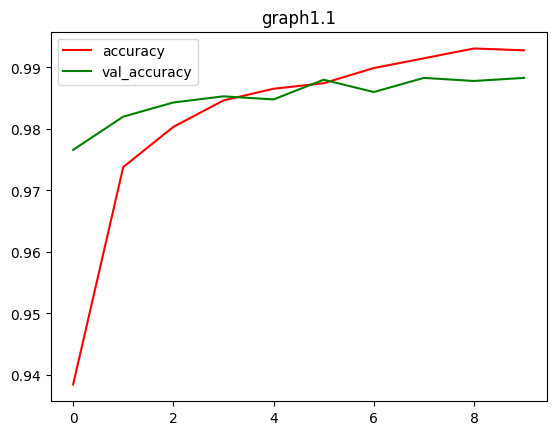

In [66]:
plt.title('graph1.1')
plt.plot(accuracy , 'red' , label = 'accuracy')
plt.plot(val_accuracy , 'green' , label = 'val_accuracy')
plt.legend()
plt.show()

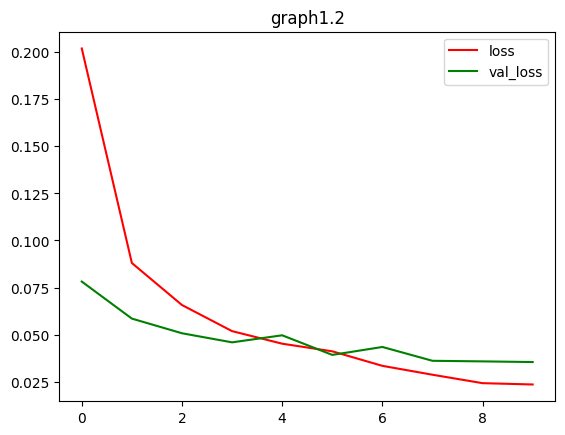

In [67]:
plt.title('graph1.2')
plt.plot(loss , 'red' , label = 'loss')
plt.plot(val_loss , 'green' , label = 'val_loss')
plt.legend()
plt.show()